# Lanceur d'alerte de jeux de grattages

#### Préambule :

A la fin des années 2000, monsieur Robert Riblet avait mis la FDJ (Française des Jeux) dans l'embarras en révélant que les jeux de grattage (Millionnaire, Banco, Astro et autres, qui représentent près de la moitié des mises totales auprès de la FDJ) n'étaient pas vraiment des jeux de hasard.

La FDJ vendait ses produits par "livrets" de 50 tickets. Mais alors qu'ils auraient dû, comme la loi l'imposait à l'époque, présenter un nombre aléatoire de lots, ce n'était pas le cas : en réalité, chacun contenait un nombre fixe de "lots significatifs" (supérieurs à 20 euros).

Une fois ces lots trouvés, on a donc l'assurance que le reste du carnet ne contiendra rien d'intéressant. Le carnet continuera pourtant d'être vendu, provoquant une "rupture d'égalité entre les joueurs".

#### Origine de l'alerte :

- Les tickets de "VEGAS" sont vendus par rouleaux de 150000 unités.
- On découpe ces rouleaux en carnets de 50 tickets, que l'on appelle BANDES.
- Parmi les 1500000 tickets produits, 40529 permettent de gagner plus de 20€.
- Un ticlet est dit "significatif" s'il rapporte plus de 20€.

"La répartition des lots dans les jeux à gratter n'obéirait pas à la seule loi du hasard. En clair, lorsque sur une bande de Vegas sort un ticket à 20 euros ou plus, ce que l'on appelle dans le jargon un lot 'significatif', il n'y aurait plus aucune chance de renouveler l'exploit sur la même bande".

Plus loin, il est mentionné le résultat d'une enquête :

"Nous avons, sous contrôle d'huissier, acheté et fait gratter 25 carnets de Vegas, soit 1250 tickets, et constaté qu'aucune bande ne comportait plus d'un lot significatif".

#### Question :

L'hypothèse que "la répartition des tickets est aléatoire et uniforme" est-elle vraie ou fausse ?

## Etape 1

Supposons que l'hypothèse émise au départ soit vraie, la répartition des tickets est alors aléatoire et uniforme.
Calculer la probabilité, notée p, que le ticket acheté soit significatif

In [3]:
p = 40529/1500000
p

0.027019333333333333

La probabilité p que le ticket soit significatif est environ de 2,7%

## Etape 2

Supposons que l'hypothèse émise au départ soit vraie, l'obtention d'un ticket significatif lors d'un grattage est indépendant des grattages précédents.

On note X la variable aléatoire qui compté le nombre de tickets significatifs présents dans un carnet de 50 tickets.

X suit donc une loi binomiale car on a une succession d'épreuve qui donne un succès ou un échec de paramètre n=50 et p=0.02

On veut calculer q = P(X>=2)

In [4]:
import scipy.stats as sc

X = sc.binom(50, p)
q = 1 - X.cdf(1)
q

0.39279881245519443

#### Simulation de X

In [7]:
from random import *
from math import floor

In [12]:
def binom(n, p):
    X = 0
    for k in range(n):
        X = X + floor(random()+p)
    return X

In [15]:
carnets_25 = [binom(50,p) for k in range(25)]

Pour un lot de 25 carnets (de 50 tickets), on note N la variable aléatoire qui compte le nombre de carnets ayant au moins deux tickets significatifs.

La fonction nommée comptage_carnets a pour paramètre Liste_carnets et elle renvoie la valeur prise par N.

In [21]:
def comptage_carnets(Liste_carnets):
    n=0
    for a in Liste_carnets:
        if a>=2:
            n=n+1
    return n

In [22]:
comptage_carnets(carnets_25)

9

#### Loi de probabilité de N

In [23]:
L = []

In [24]:
for i in range(10000):
    carnets_25 = [binom(50,p) for k in range(25)]
    nb = comptage_carnets(carnets_25)
    L.append(nb)

In [26]:
F = [L.count(k) / 10000 for k in range(max(L) + 1)]
print(F)

[0.0, 0.0, 0.0005, 0.0023, 0.0076, 0.0231, 0.048, 0.0855, 0.1224, 0.1586, 0.1609, 0.1427, 0.1074, 0.071, 0.039, 0.02, 0.0074, 0.0024, 0.0009, 0.0003]


In [27]:
import pylab as pl
pl.style.use('bmh')

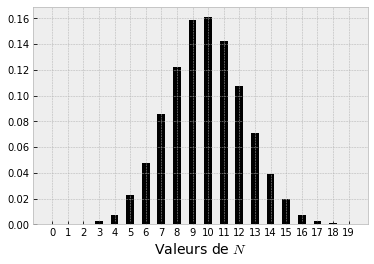

In [28]:
pl.bar(range(max(L) + 1), F,
       width = 0.5, color = 'black', 
       label = 'Simulations')
pl.xticks(range(max(L)+1))
pl.xlabel('Valeurs de $N$', fontsize = 14)
pl.show()

N suit une loi binomiale aussi de paramètre n=25 et p=0,39

In [29]:
N = sc.binom(25, q)
P = [N.pmf(k) for k in range(max(L) + 1)]

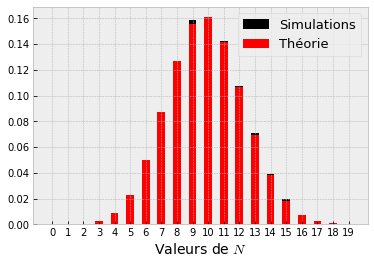

In [31]:
pl.bar(range(max(L) + 1), F,
       width = 0.5, color = 'black', 
       label = 'Simulations')
pl.bar(range(max(L) + 1), P,
       width = 0.5, color = 'red', 
       label = 'Théorie')
pl.xticks(range(max(L)+1))
pl.xlabel('Valeurs de $N$', fontsize = 14)
pl.legend(fontsize = 13)
pl.show()

#### Vraisemblance de N

On calcule P(N=0)

In [32]:
N.pmf(0)

3.831027828415992e-06

On voit qu'il est très rare d'observer N=0, donc on peut penser que la répartition n'est ni aléatoire ni uniforme.

#### Remarque :

Même si monsieur Riblet a perdu la plupart des procédures judiciaires, la FDJ a depuis ajouté à ses tickets la mention "au moment de votre achat, certains lots ont peut-être déjà été remportés"